# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

#### The original dataset of reviews consists of actual review and generated. Artificial reviews were generated on the basis of the beginning of the actual reviews.
#### Complexity metrics were extracted via the script from the  [ComplexityModel Repository](https://github.com/PlainDocument/Complexity-models)


In [2]:
complexity_metrics = pd.read_csv("../data/full_review_complexity.csv", index_col=False)
complexity_metrics

,fname,N_word,V_word,N_lemma,V_lemma,C,punct,let,N,syl,...,Discourse_pr,Mark_pr,Nsubj_pr,Nsubjpass_pr,Nummod_pr,Orphan_pr,Parataxis_pr,Xcomp_pr,Cohes_1,Cohes_2
0,actual_reviews.csv,733200,94118,733200,62276,2895157,302070,2342823,6686,976890,...,0.390000,6.6250,26.750833,1.414167,1.5425,0.218333,6.455833,5.519167,5201,61937
1,gen_reviews.csv,516000,56049,516000,37954,2588493,146412,2116022,13698,846329,...,0.440833,3.9125,21.502500,1.451667,2.0075,0.074167,4.085833,6.282500,8431,58483


### We have 133 metrics. Each is some linguistics feature. For instance, we have number of nouns, verbs, punctuation, etc.

In [3]:
list(complexity_metrics.columns)

['fname',
 'N_word',
 'V_word',
 'N_lemma',
 'V_lemma',
 'C',
 'punct',
 'let',
 'N',
 'syl',
 'sent',
 'word_long',
 'word_long_pr',
 'lemma_long',
 'lemma_long_pr',
 'comma_pr',
 'ASL',
 'ASS',
 'ASW',
 'ACW',
 'L',
 'S',
 'TTR_word',
 'TTR_lemma',
 'YulesK_word',
 'YulesK_lemma',
 'YulesI_word',
 'YulesI_lemma',
 'hapax1_pr',
 'hapax2_pr',
 'FRE_GL',
 'SMOG',
 'ARI',
 'DCI',
 'CLI',
 'Func_word_pr',
 'Verb_pr',
 'Noun_pr',
 'Adj_pr',
 'Prop_pr',
 'Autosem_pr',
 'Nouns_pr',
 'NVR',
 'Cconj_pr',
 'Sconj_pr',
 'Adjs_pr',
 'Prtf_pr',
 'Prts_pr',
 'Npro_pr',
 'Pred_pr',
 'Grnd_pr',
 'Infn_pr',
 'Numr_pr',
 'Prcl_pr',
 'Prep_pr',
 'Comp_pr',
 'Pos_ngrams_1_pr',
 'Pos_ngrams_2_pr',
 'Pos_ngrams_3_pr',
 'Pos_ngrams_4_pr',
 'Pos_ngrams_5_pr',
 'Pos_ngrams_6_pr',
 'Pos_ngrams_7_pr',
 'Pos_ngrams_8_pr',
 'Pos_ngrams_9_pr',
 'Pos_ngrams_10_pr',
 'Pos_ngrams_11_pr',
 'Pos_ngrams_12_pr',
 'Dyn_Stat',
 'Zipf_0_pr',
 'Zipf_1_pr',
 'Zipf_2_pr',
 'Zipf_3_pr',
 'Zipf_4_pr',
 'Zipf_5_pr',
 'Zipf_6_pr',

## Let's Visualize

#### Word and Lemma Counts

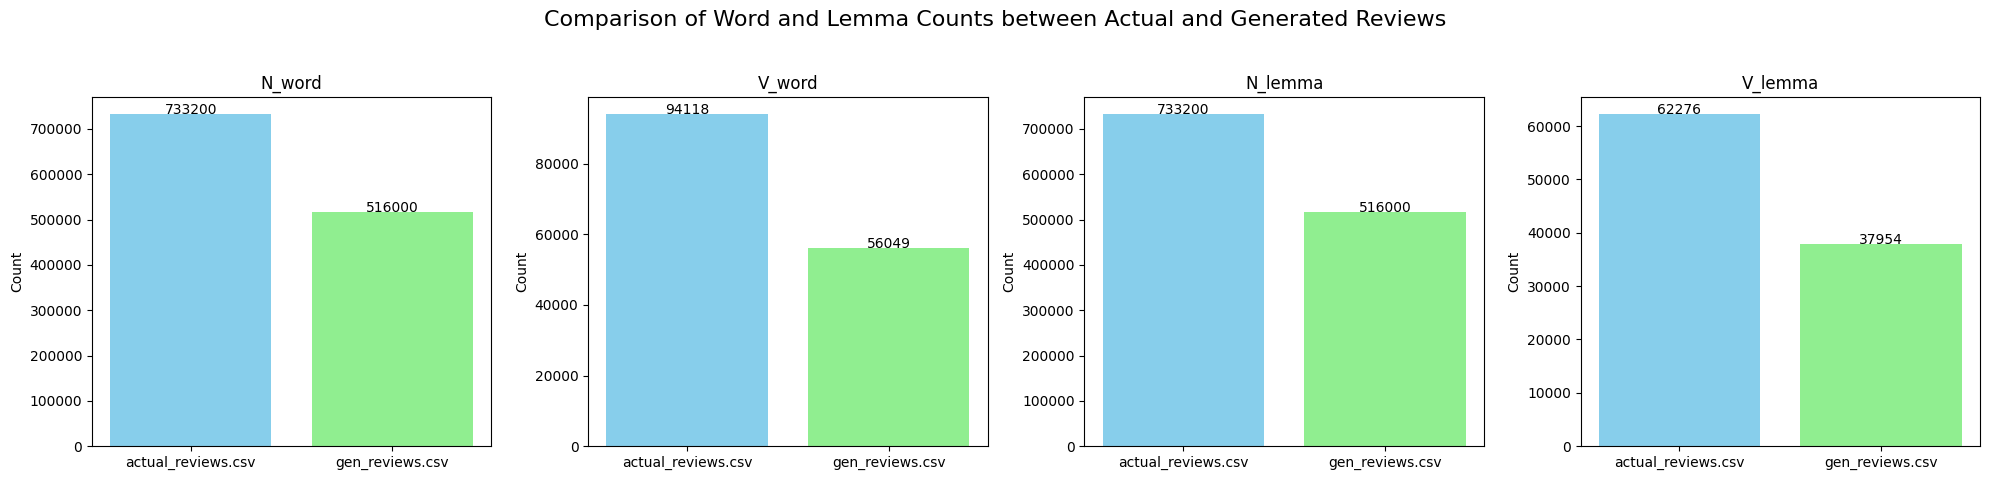

In [4]:
word_lemma_counts = complexity_metrics[["fname", "N_word", "V_word", "N_lemma", "V_lemma"]]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Comparison of Word and Lemma Counts between Actual and Generated Reviews', fontsize=16)

for i, col in enumerate(word_lemma_counts.columns[1:]):  
    axes[i].bar(word_lemma_counts["fname"], word_lemma_counts[col], color=['skyblue', 'lightgreen'])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    for index, value in enumerate(word_lemma_counts[col]):
        axes[i].text(index, value, str(value), ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

Word Count:
- Actual Reviews: 733,200 words
- Generated Reviews: 516,000 words
- The actual reviews have a significantly higher word count compared to the generated reviews, indicating that they are either longer or more numerous, which suggests a more extensive dataset or more verbose reviewers.

Verb Count (V_word):
- Actual Reviews: 94,118 verbs
- Generated Reviews: 56,049 verbs
- There are more verbs in the actual reviews, which could suggest that they use more complex sentences with more actions, reflecting a more dynamic or detailed expression of opinions.


Verb Lemma Count (V_lemma):
- Actual Reviews: 62,276 verb lemmas
- Generated Reviews: 37,954 verb lemmas
- The actual reviews contain a higher number of unique verb lemmas compared to the generated reviews, suggesting a greater variety of verbs used. This contributes to a richer linguistic expression and may reflect a wider range of actions and opinions in the actual reviews.

#### POS Percentage

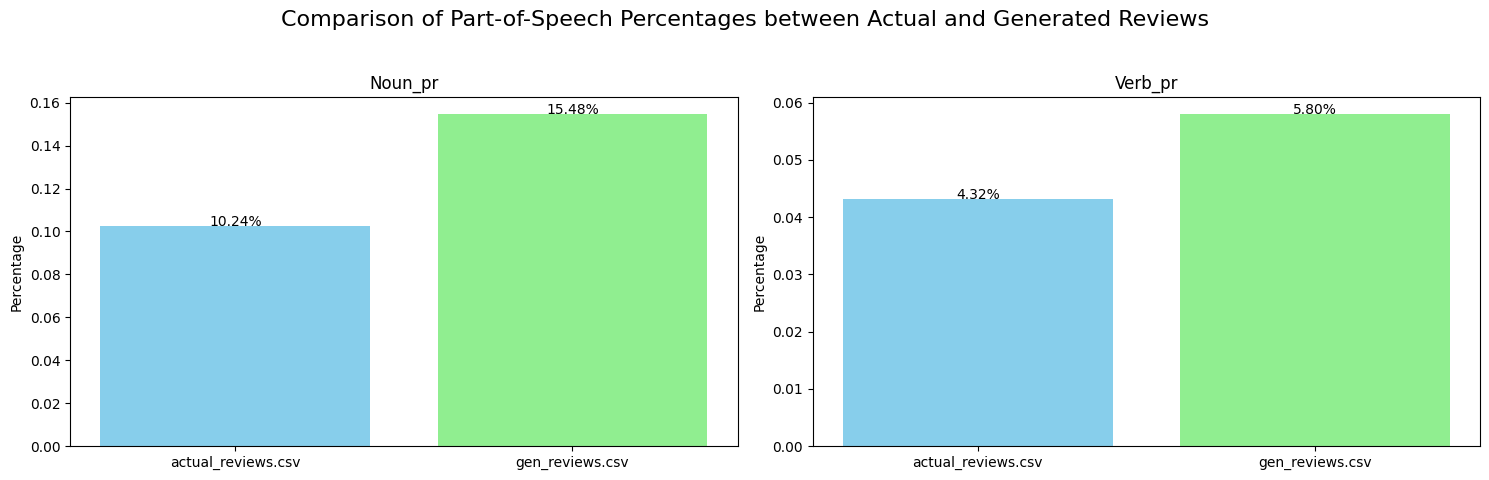

In [5]:
pos_percentages_adjusted = complexity_metrics[["fname", "Noun_pr", "Verb_pr"]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Comparison of Part-of-Speech Percentages between Actual and Generated Reviews', fontsize=16)

for i, col in enumerate(pos_percentages_adjusted.columns[1:]):  
    axes[i].bar(pos_percentages_adjusted["fname"], pos_percentages_adjusted[col], color=['skyblue', 'lightgreen'])
    axes[i].set_title(col)
    axes[i].set_ylabel('Percentage')
    for index, value in enumerate(pos_percentages_adjusted[col]):
        axes[i].text(index, value, f"{value:.2%}", ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


Noun Percentage (Noun_pr):
- Actual Reviews: 10.24%
- Generated Reviews: 15.48%
- The generated reviews have a higher percentage of nouns compared to the actual reviews. This could suggest that the generated text is more focused on subjects or objects rather than actions or descriptions, which might be indicative of a more descriptive or static nature of the content.

 Verb Percentage (Verb_pr):
- Actual Reviews: 4.32%
- Generated Reviews: 5.80%
- Conversely, the generated reviews also contain a higher percentage of verbs. This is somewhat in contrast with the higher noun usage and could indicate that while the generated reviews are descriptive, they also possibly include a variety of actions or states being described, which might be an attempt to mimic the dynamic nature of actual review content.

The actual reviews have lower percentages for both nouns and verbs, which might imply a more balanced or varied use of other parts of speech not represented in this chart, such as adjectives, adverbs, or pronouns.

#### Readability Scores

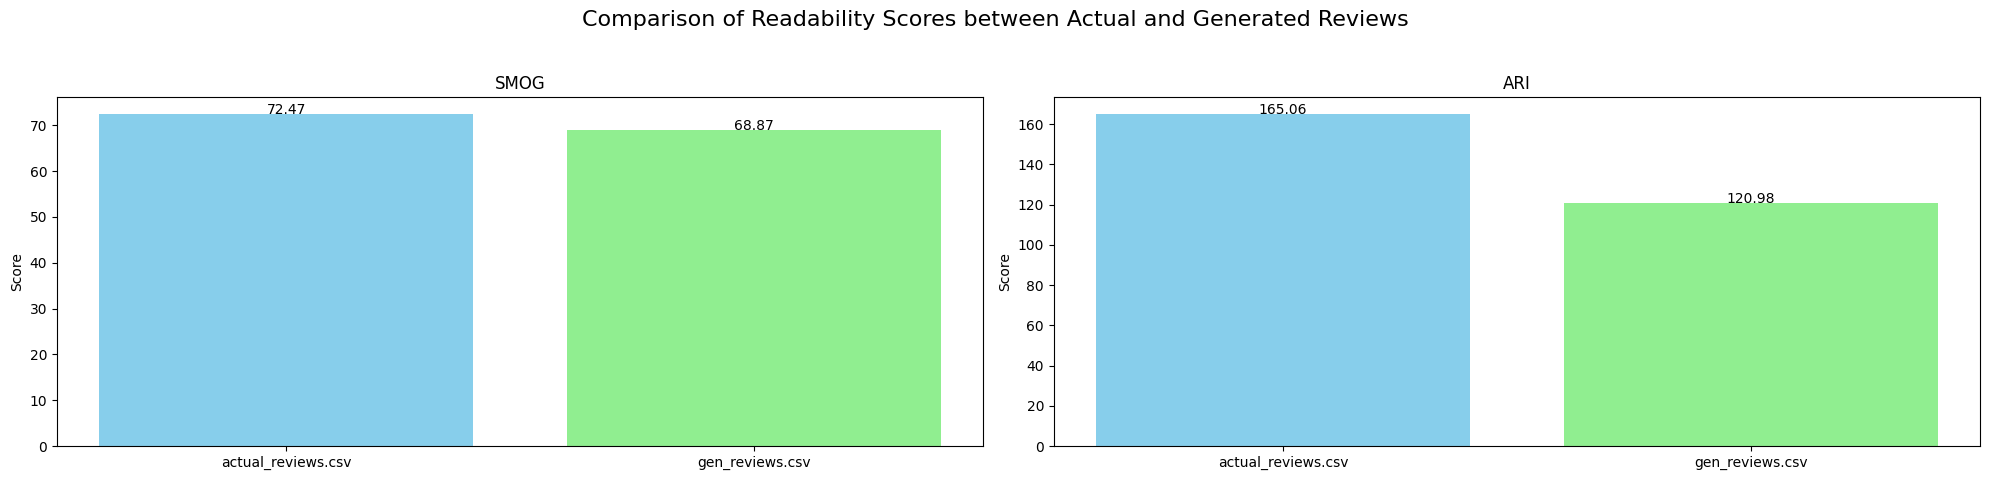

In [6]:
readability_scores = complexity_metrics[["fname", "SMOG", "ARI"]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Comparison of Readability Scores between Actual and Generated Reviews', fontsize=16)

for i, col in enumerate(readability_scores.columns[1:]):  
    axes[i].bar(readability_scores["fname"], readability_scores[col], color=['skyblue', 'lightgreen'])
    axes[i].set_title(col)
    axes[i].set_ylabel('Score')
    for index, value in enumerate(readability_scores[col]):
        axes[i].text(index, value, str(round(value, 2)), ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

SMOG Index (SMOG):
- Actual Reviews: 72.47
- Generated Reviews: 68.87
- The SMOG index, which estimates the years of education needed to understand a piece of writing, is slightly higher for actual reviews. This suggests that the actual reviews might use slightly more complex language, although both scores indicate a high level of complexity.

Automated Readability Index (ARI):
- Actual Reviews: 165.06
- Generated Reviews: 120.98
- The ARI scores are also exceptionally high, with actual reviews having a higher ARI compared to generated reviews. This index suggests that the actual reviews are written at a more sophisticated level linguistically.

